# Семинар 03 – Линейные модели
Отличный и подробный [материал](https://education.yandex.ru/handbook/ml/article/linear-models#drugie-lossy) по линейным моделям

<a id="Content"></a>
# Содержание
0. [Постановка задачи](#0)
1. [Метрики регрессии](#1)
2. [Аналитический метод поиска минимума по МНК](#2)
3. [Градиентный спуск](#3)
   - [Слишком маленький шаг обучения (learning rate)](#3.1)
   - [Слишком большой шаг обучения (learning rate)](#3.2)
   - [Подбор гиперпараметра learning rate](#3.3)
4. [Модификации градиентного спуска](#4)
   - [Пакетный градиентный спуск](#4.1)
   - [Cтохастический градиентный спуск](#4.2)
5. [Функции потерь в регрессии](#5)
6. [Мультиколлинеарность и регуляризация](#6)
   - [Данные](#6.1)
   - [Реализуем линейную регрессию с L2 регуляризацией](#6.2)

In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

<a id="0"></a>
# 0. Постановка задачи

Линейная модель - это: $$ \hat{y} = f(x) = \theta_0*1 + \theta_1*x_1 + ... + \theta_n*x_n = \theta^T*X$$

Сгенерируем исскуственные данные, на основе функции:
$$f(x) = 4x+5$$

In [315]:
def lin_function(x):
    return 4*x+5

x_true = np.array([-2,2])
y_true = lin_function(x_true)

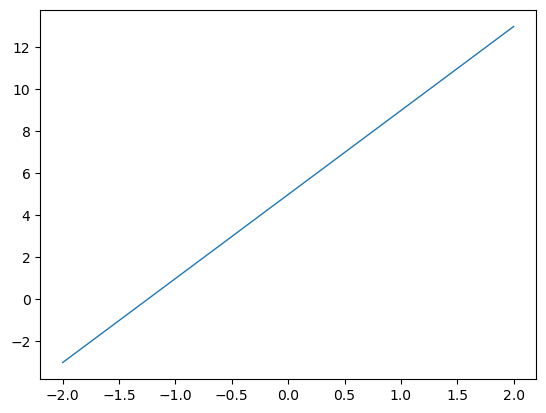

In [316]:
plt.plot(x_true, y_true, linewidth=1)
plt.show()

In [317]:
n = 100
x = np.random.rand(n, 1) * 4 - 2
e = np.random.rand(n, 1) * 4 - 2
y = lin_function(x) + e

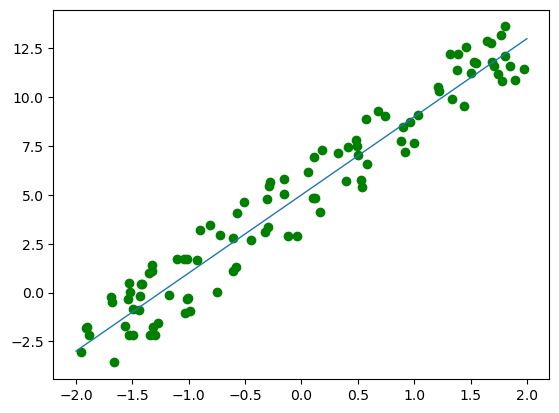

In [318]:
plt.scatter(x, y, color='g')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

<a id="1"></a>
# 1. Метрики регрессии

Mean Absoulute Error:
$$MAE = \frac1N \sum_{i = 1}^N|f(x_i) - y_i| = \frac1N \sum_{i = 1}^N|\hat y_i - y_i| = \frac1N || \hat Y - Y||_1$$

Mean Sqared Error:
$$MSE = \frac1N \sum_{i = 1}^N(f(x_i) - y_i)^2 = \frac1N \sum_{i = 1}^N(\hat y_i - y_i)^2 = \frac1N ||\hat Y - Y||_2$$


Почему работаем с MSE?

<a id="2"></a>
# 2. Аналитический метод поиска минимума по МНК

$$MSE -> min $$

$$MSE = \frac1N \sum_{i = 1}^N(\hat y_i - y_i)^2 = \frac1N \sum_{i = 1}^N(\theta_i * x_i - y_i)^2 = \frac1N ||X \theta - Y||_2 = \frac1N (X\theta - Y)^T*(X\theta - Y) $$



$$ \frac{d}{d\theta}[\frac1N (X\theta - Y)^T*(X\theta - Y)] =  \frac1N \frac{d}{d\theta}[Y^TY - 2Y^TX\theta+\theta^TX^TX\theta]  $$

$$\hat \theta = \bigl(X^T \cdot X  \bigr)^{-1} \cdot X^T \cdot y $$

In [319]:
x_matrix = np.c_[np.ones((n, 1)), x]

**Задание 0:** Реализуйте формулу оптимального вектора весов

In [320]:
%%time
thetha_matrix = np.linalg.inv((x_matrix.T @ x_matrix) ) @ x_matrix.T @ y

CPU times: user 67 μs, sys: 0 ns, total: 67 μs
Wall time: 69.9 μs


Обратите внимание на время работы

In [321]:
print("Свободный член: {[0][0]:.7}".format(thetha_matrix.T))
print("Коэфициент: {[0][1]:.7}".format(thetha_matrix.T))

Свободный член: 5.101252
Коэфициент: 3.993225


In [322]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [323]:
lr = LinearRegression()
%time lr.fit(x,y)

CPU times: user 4.53 ms, sys: 82 μs, total: 4.61 ms
Wall time: 1.4 ms


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [324]:
print("Свободный член: {:.7}".format(lr.intercept_[0]))
print("Коэфициент: {:.7}".format(lr.coef_[0][0]))

Свободный член: 5.101252
Коэфициент: 3.993225


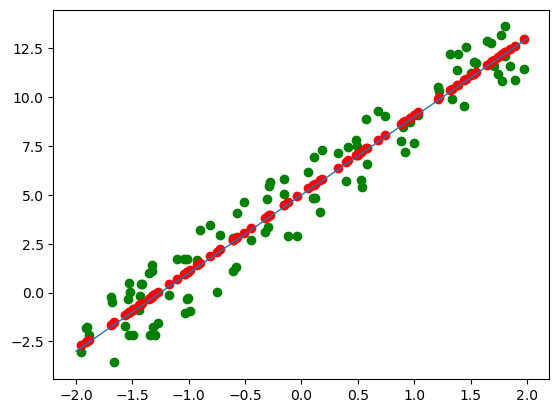

In [325]:
plt.scatter(x, y, color='g')
plt.scatter(x, lr.predict(x), color='r')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

<a id="3"></a>
# 3. Градиентный спуск

$$\theta^{(t+1)} = \theta^{(t)} - lr\cdot \nabla MSE(\theta^{(t)}),$$
где $lr$ — длина шага градиентного спуска (learning rate).

$$\nabla MSE(\theta)= \frac{2}{N} X^T \cdot \bigl(X \cdot \theta - Y \bigr) $$

**Задание 1:** Реализовать градиентный спуск по формулам

In [326]:
# напоминание, что в переменной n мы задавали размер выборки
x_matrix.shape

(100, 2)

In [327]:
def linear_backward(x, y, theta):
    gradients = 2 / n * x.T @ (x @ theta - y)
    return gradients


def update_theta(theta, gradient, lr):
    theta = theta - lr * gradient
    return theta

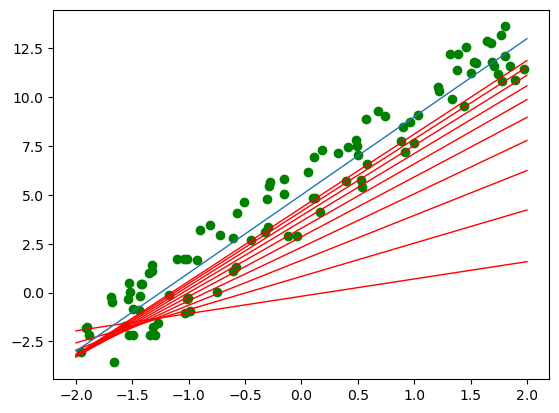

[[5.10125198]
 [3.9932246 ]]
CPU times: user 803 ms, sys: 62.6 ms, total: 866 ms
Wall time: 372 ms


In [328]:
%%time
lr = 0.1  # learning rate
n_iterations = 150

theta = np.random.randn(2,1)  # random initialization
plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
        
    gradients = linear_backward(x_matrix, y, theta)
    theta = update_theta(theta, gradients, lr)

plt.plot(x_true, y_true, linewidth=1)
plt.show()

print(theta)

<a id="3.1"></a>
## 3.1. Слишком маленький шаг обучения (learning rate)

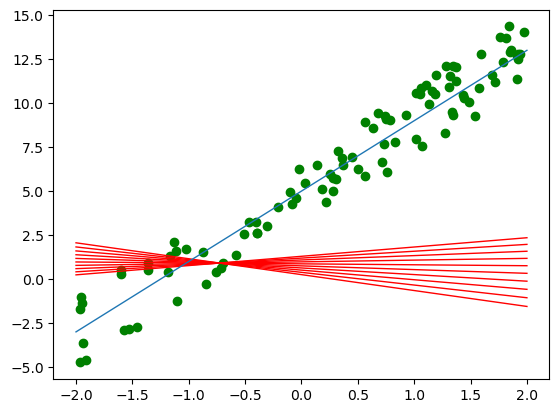

In [158]:
lr = 0.01  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
        
    gradients = linear_backward(x_matrix, y, theta)
    theta = update_theta(theta, gradients, lr)

plt.plot(x_true, y_true, linewidth=1)
plt.show()

<a id="3.2"></a>
## 3.2. Слишком большой шаг обучения (learning rate)

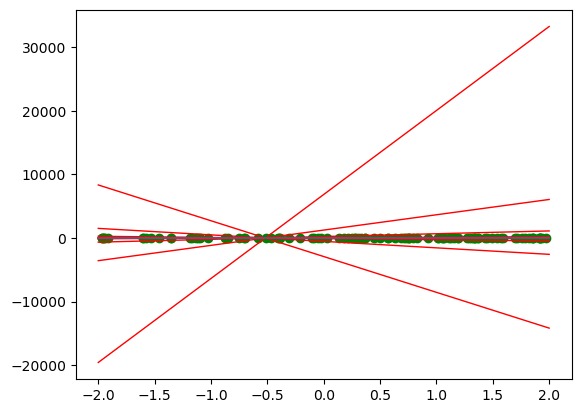

In [159]:
lr = 1.01  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
        
    gradients = linear_backward(x_matrix, y, theta)
    theta = update_theta(theta, gradients, lr)

plt.plot(x_true, y_true, linewidth=1)
plt.show()

<a id="3.3"></a>
## 3.3. Подбор гиперпараметра learning rate

**Задание 2**: Предложите стратегию уменьшения шага обучения

In [160]:
def dynamic_lr(iter_num, base_lr):
    base_lr = 1 / (iter_num + 1) * base_lr
    return base_lr

In [161]:
lr = 1  # learning rate
n_iterations = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = linear_backward(x_matrix, y, theta)
    
    cur_lr = dynamic_lr(iteration, lr)
    theta = update_theta(theta, gradients, cur_lr)

print(theta)

[[5.03843231]
 [4.1568694 ]]


Learning rate - гипперпараметр, и можно воспользоваться GridSearchCV, однако чтобы не учить каждый раз такое кол-во итераций, мы можем измерять норму градиента, и прекращать спуск, когда он "затух"

**Задание 3**: Добавить проверку нормы градиента для остановки спуска

In [162]:
gradients

array([[ 0.00023019],
       [-0.00011467]])

In [163]:
lr = 1  # learning rate
n_iterations = 1000
tol = 0.0001 # значение для проверки затух ли градиент

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = linear_backward(x_matrix, y, theta)
    
    # Проверка нормы градиента для критерия останова
    if (np.linalg.norm(gradients) < tol):
      break
        
    cur_lr = dynamic_lr(iteration, lr)
    theta = update_theta(theta, gradients, cur_lr)

print('Градиент затух на {} итерации '.format(iteration))
print(theta)

Градиент затух на 255 итерации 
[[5.03834926]
 [4.15691115]]


__Реализация в Scikit-Learn отсутствует__
  
  

<a id="4"></a>
# 4. Модификации градиентного спуска
[Сравнение](https://www.baeldung.com/cs/gradient-stochastic-and-mini-batch) рассмотренных подходов градиентного спуска

<a id="4.1"></a>
## 4.1. Пакетный градиентный спуск

Матожидание оценки градиента на случайной подвыборке равно градиенту

In [164]:
!pip install tqdm

In [165]:
from tqdm import auto

**Задание 4**: Реализуйте пакетный градиентный спуск. Для этого необходимо случайным образом выбрать M объектов из x_matrix и соответствующие им значения из y

In [341]:
n_epochs = 100
M = 10 # размер случайной подвыборки
# напоминание, что в переменной n = 100 мы задавали размер выборки

theta = np.random.randn(2,1)  # random initialization

for epoch in auto.tqdm(range(n_epochs)):
    for i in range(n):
        # Случайный пакет
        idx = np.random.choice(n, M, replace=False) 
        xi = x_matrix[idx]
        yi = y[idx]
        
        gradients = linear_backward(xi, yi, theta)
    
        # Проверка нормы градиента для критерия останова
        if np.linalg.norm(gradients) < tol:
            break


        cur_lr = dynamic_lr(epoch, lr)
        theta = update_theta(theta, gradients, cur_lr)
        
print(theta)
print('Градиент затух на {} итерации '.format(epoch))

  0%|          | 0/100 [00:00<?, ?it/s]

[[5.09841408]
 [3.99192182]]
Градиент затух на 99 итерации 


In [167]:
from sklearn.linear_model import SGDRegressor

In [168]:
sgd = SGDRegressor(tol=0.0001)
sgd.fit(x,y)
sgd.intercept_, sgd.coef_

(array([5.02975206]), array([4.16159338]))

<a id="4.2"></a>
## 4.2. Cтохастический градиентный спуск

Ещё более случайная версия пакетного градиентного спуска, для которой размер выборки равен 1

**Задание 5**: Используя ячейку выше, найдите коэффициенты стохастическим градиентным спуском

In [343]:
n_epochs = 100
M = 1 # размер случайной подвыборки

theta = np.random.randn(2,1)  # random initialization

for epoch in auto.tqdm(range(n_epochs)):
    for i in range(n):
        # Случайный пакет
        idx = np.random.choice(n, M, replace=False) 
        xi = x_matrix[idx]
        yi = y[idx]
        
        gradients = linear_backward(xi, yi, theta)
    
        # Проверка нормы градиента для критерия останова
        if np.linalg.norm(gradients) < tol:
            break


        cur_lr = dynamic_lr(epoch, lr)
        theta = update_theta(theta, gradients, cur_lr)
        
print(theta)
print('Градиент затух на {} итерации '.format(epoch))

  0%|          | 0/100 [00:00<?, ?it/s]

[[3.19010314]
 [2.783762  ]]
Градиент затух на 99 итерации 


<a id="5"></a>
# 5. Функции потерь в регрессии

In [330]:
with open('data/data_preprocessed.json') as file:
    X = pd.read_json(file)

In [172]:
X_subset = X[[7, 15]].values
X_subset_modified = np.vstack((X_subset, [[1, 90], [2, 50]]))

In [173]:
def scatter_points_and_plot_line_MSE(X_subset):
    plt.scatter(X_subset[:, 0], X_subset[:, 1])
    lr = LinearRegression()
    lr.fit(X_subset[:, 0][:, None], X_subset[:, 1])
    grid = np.linspace(0, 2, 100)
    line = lr.predict(grid[:, None])
    plt.plot(grid, line)

Text(0.5, 0, 'x')

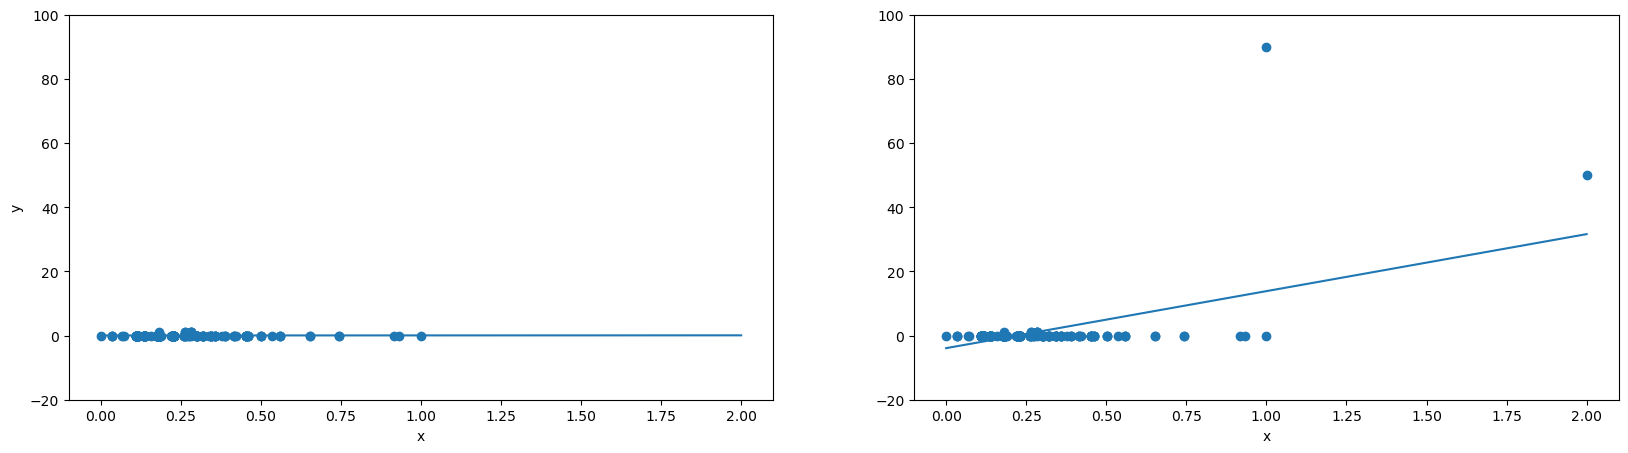

In [174]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MSE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MSE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")

Из-за шумовых объектов прямая достаточно сильно изменила наклон. Поэтому вместо MSE часто используют Mean Absoulte Error:
$$L(y_i, a(x_i)) = |y_i - a(x_i)|$$

Можно заметить, что в MAE по сравнению с MSE существенно меньший вклад в ошибку будут вносить примеры, сильно удалённые от ответов модели. Дело тут в том, что в MAE мы считаем модуль расстояния, а не квадрат, соответственно, вклад больших ошибок в MSE получается существенно больше. Такая функция потерь уместна в случаях, когда вы пытаетесь обучить регрессию на данных с большим количеством выбросов в таргете.

Теперь обучим регрессию, оптимизируя MAE. В sklearn такая регрессия не реализована, но можно использовать модуль statsmodels

In [175]:
!pip install statsmodels

In [176]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Text(0.5, 0, 'x')

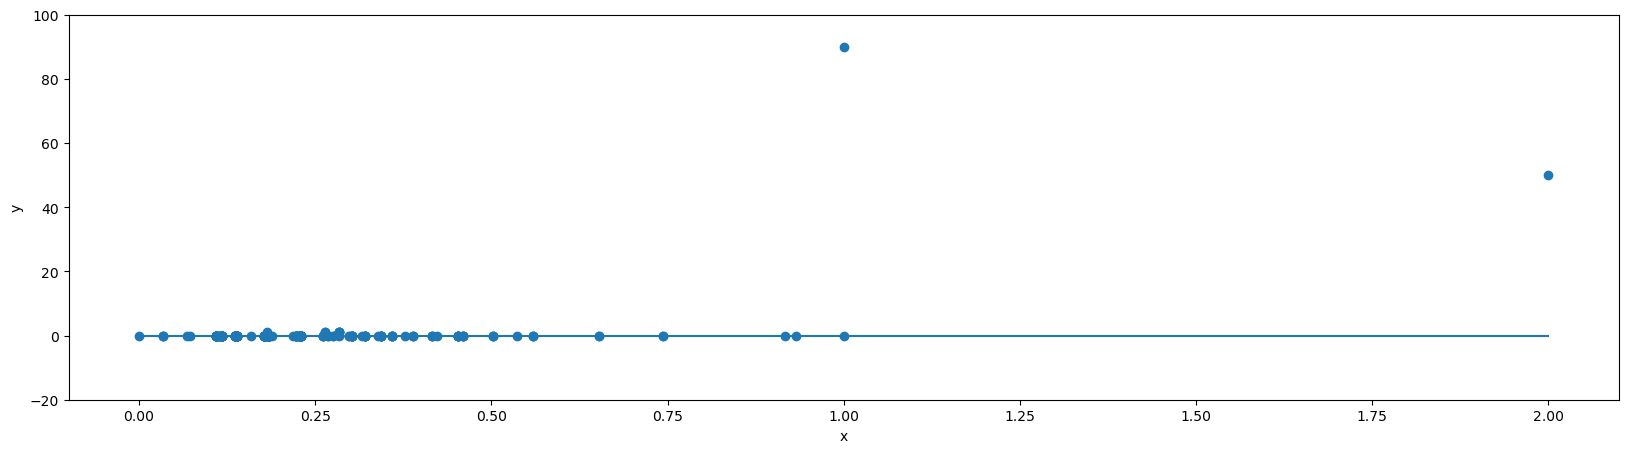

In [177]:
plt.figure(figsize=(20, 5))
plt.ylabel("y")
mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset_modified, columns=["f7", "f15"])) # задаеем зависимость и передаем данные
res = mod.fit(q=0.5)
plt.scatter(X_subset_modified[:, 0], X_subset_modified[:, 1])   # визуализируем точки
grid = np.linspace(0, 2, 100)
plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])   # визуализируем прямую
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая не изменила направление из-за выбросов. Попробуем добавить больше шумовых объектов:

In [178]:
X_subset_modified_twice = np.vstack((
    X_subset_modified, 
    np.random.randint(5, size=60).reshape(-1, 2) * [1, 30],
))

Text(0.5, 0, 'x')

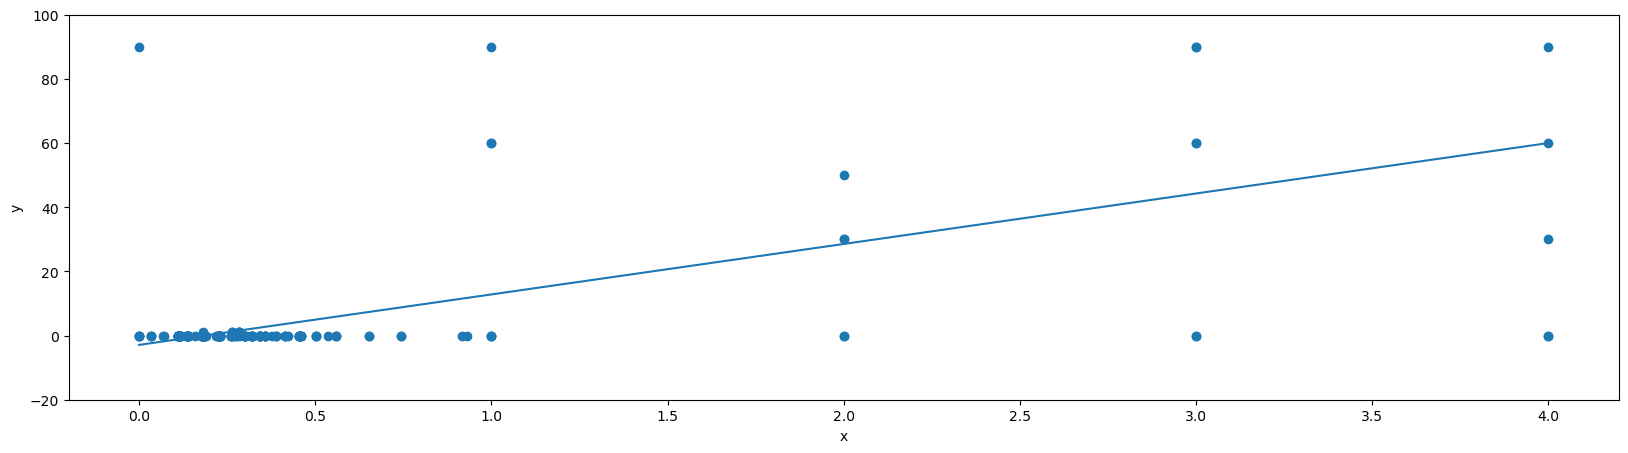

In [179]:
plt.figure(figsize=(20, 5))
plt.ylabel("y")
mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset_modified_twice, columns=["f7", "f15"])) # задаеем зависимость и передаем данные
res = mod.fit(q=0.5)
plt.scatter(X_subset_modified_twice[:, 0], X_subset_modified_twice[:, 1])   # визуализируем точки
grid = np.linspace(0, 4, 200)
plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])   # визуализируем прямую
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая изменила наклон, когда мы добавили 30 (почти 15%) шумовых точек.

<a id="6"></a>
# 6. Мультиколлинеарность и регуляризация

In [180]:
!pip install seaborn

In [181]:
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<a id="6.1"></a>
## 6.1. Данные

[Источник](https://habr.com/ru/articles/206306/)

In [397]:
def my_linear_regression(X_train, Y_train):
    return np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train) 

def predict(X, w):
    return np.dot(X, w)

In [398]:
data = pd.read_csv('data/energy_efficiency.csv')

Для примера решения задачи прогнозирования, возьмём набор данных Energy efficiency из крупнейшего репозитория UCI.   

В нем $X_1 ... X_8$ — характеристики помещения, на основании которых будет проводиться анализ, а $y_1,y_2$ — значения нагрузки, которые надо спрогнозировать.
- $X_1$	Относительная компактность
- $X_2$	Площадь
- $X_3$	Площадь стен
- $X_4$	Площадь потолка	
- $X_5$	Общая высота	
- $X_6$	Ориентация
- $X_7$	Площадь остекления	
- $X_8$	Распределенная площадь остекления	
- $y_1$	Нагрузка при обогреве
- $y_2$	Нагрузка при охлаждении

In [399]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Посмотрим на скоррелированность данных

<Axes: >

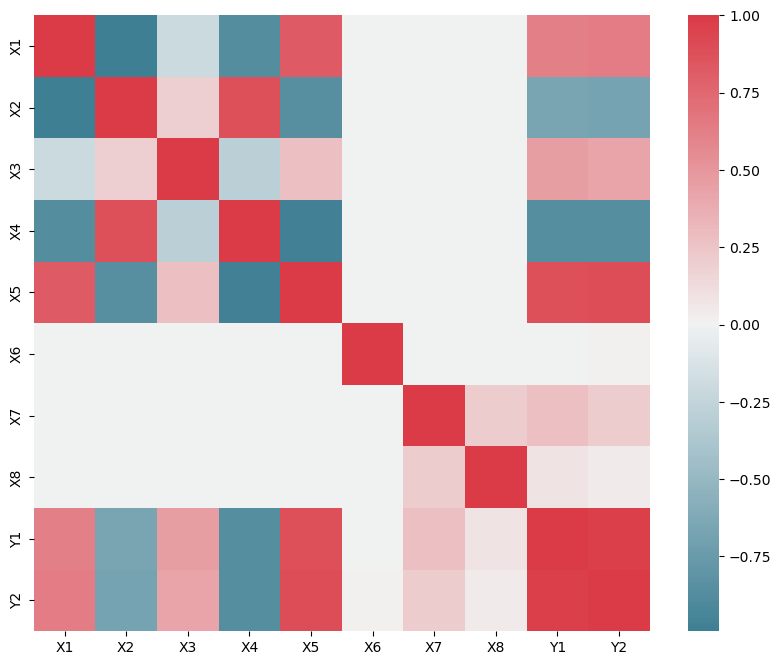

In [401]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))

<Axes: >

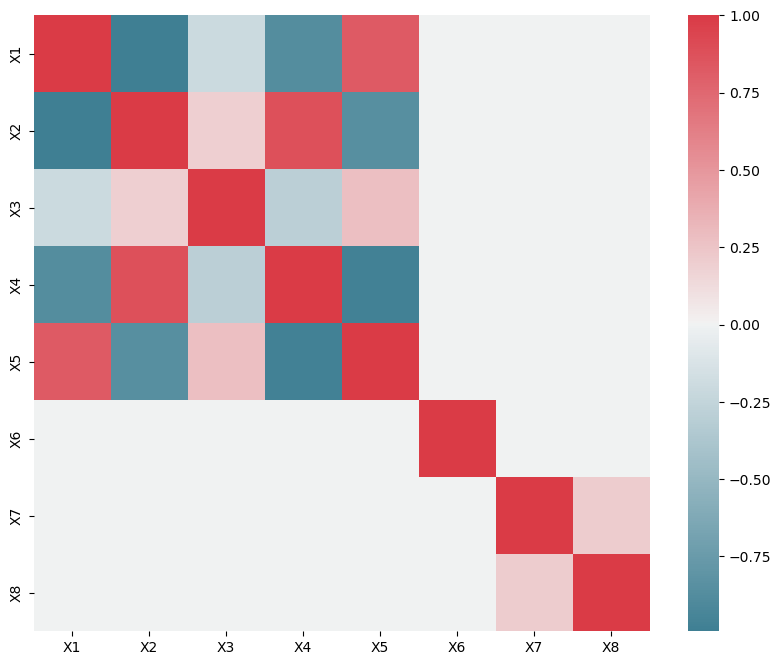

In [402]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.drop(['Y1','Y2'], axis=1).corr()
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))

Видим, что x1 скоррелирован с x2, а x4 с x5.

### Посмотрим, как на таких данных отработает наша линейная регрессия

Разобьем выборку на train и test

In [403]:
X = data.drop(['Y1','Y2'], axis=1)
y = data['Y1']

In [404]:
X.shape, y.shape

((768, 8), (768,))

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим регрессию и посмотрим на качество

In [422]:
w = my_linear_regression(X_train, y_train)

In [423]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  984.877194548636
Train R2:  -8.758610939163482


In [424]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  996.4045781451571
Test R2:  -8.559450702621378


Как-то не очень

### Попробуем убрать скоррелированные признаки

**Задание 6**: Выделите данные для обучения без скоррелированных признаков

In [409]:
X = X[['X3', 'X6', 'X7', 'X8', 'X1']]
y = data['Y1']

In [410]:
X.shape, y.shape

((768, 5), (768,))

In [411]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим регрессию и посмотрим на качество

In [412]:
w = my_linear_regression(X_train, y_train)

In [413]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  63.238181188993245
Train R2:  0.37340735460268926


In [414]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  67.39436355948074
Test R2:  0.3534221839077666


Получили алгоритм с хорошим качеством

<a id="6.2"></a>
## 6.2. Реализуем линейную регрессию с L2 регуляризацией

Формула для вычисления весов с L2-регуляризацией

$$\omega = \bigl(X^T \cdot X - \lambda2 \cdot E \bigr )^{-1} \cdot X^T \cdot y $$

**Задание 7:** Реализуйте линейную регрессию с L2-регуляризацией по формуле вышеy

In [415]:
def my_linear_regression(X_train, Y_train, l2=0):
     return np.linalg.inv(X_train.T @ X_train - l2 * np.eye(X_train.shape[1])) @ X_train.T @ Y_train

Обучим регрессию с регуляризацией и посмотрим на качество

In [416]:
X = data.drop(['Y1','Y2'], axis=1)
y = data['Y1']

In [417]:
X.shape, y.shape

((768, 8), (768,))

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [419]:
w = my_linear_regression(X_train, y_train, l2=0.001)

In [420]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  8.566900361807843
Train R2:  0.9151152569597517


In [421]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  9.46379370130448
Test R2:  0.9092048839078906


Этого же эффекта (отсутствие переобучения) мы добились, добавив регуляризацию.